#Malaria Disease Detection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! ls

gdrive	sample_data


In [ ]:
%cd gdrive/My Drive/Dataset

/content/gdrive/My Drive/Dataset


In [ ]:
#importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cwd = os.getcwd()
print(cwd)

/content/gdrive/My Drive/Dataset


In [ ]:
data_dir = cwd 

In [ ]:
os.listdir(data_dir)

['Train', 'Test', 'my_model']

In [ ]:
train_path = data_dir + '/Train/'
test_path = data_dir + '/Test/'

In [ ]:
test_path


'/content/gdrive/My Drive/Dataset/Test/'

In [ ]:
os.listdir(test_path)

['Uninfected', 'Parasite']

In [ ]:
os.listdir(train_path)

['Uninfected', 'Parasite']

In [ ]:
os.listdir(train_path+'Parasite')[0]

'C33P1thinF_IMG_20150619_120645a_cell_217.png'

In [ ]:
parasitized_cell = train_path +'Parasite/'+ 'C33P1thinF_IMG_20150619_120645a_cell_217.png'

In [ ]:
parasitized_cell

'/content/gdrive/My Drive/Dataset/Train/Parasite/C33P1thinF_IMG_20150619_120645a_cell_217.png'

In [ ]:
imread(parasitized_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

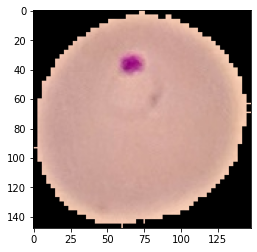

In [ ]:
plt.imshow(imread(parasitized_cell))

In [ ]:
os.listdir(train_path+'Uninfected')[5]

'C1_thinF_IMG_20150604_104722_cell_216.png'

In [ ]:
uninfected_cell = train_path + 'Uninfected/'+ 'C1_thinF_IMG_20150604_104722_cell_216.png'

In [ ]:
uninfected_cell

'/content/gdrive/My Drive/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_216.png'

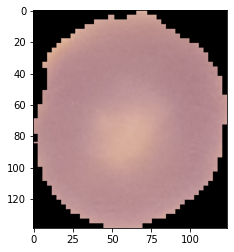

In [ ]:
imread(uninfected_cell)
plt.imshow(imread(uninfected_cell))

In [ ]:
len(os.listdir(train_path+'Parasite')),len(os.listdir(train_path+'Uninfected'))

(220, 196)

Number of images of parasitized cell is same as number of images of uninfected_cell

In [ ]:
len(os.listdir(test_path+'Parasite')),len(os.listdir(test_path+'Uninfected'))

(91, 43)

These are real images. So, they don't have same dimensions.

In [ ]:
dim1 = []
dim2 = []
import time
start=time.time()
for image_filename in os.listdir(test_path+'Uninfected'):
    
    img = imread(test_path + 'Uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
end=time.time()    
print("total time in minutes=", ((end-start)/60))

total time in minutes= 0.4105852524439494


In [ ]:
print(dim1,dim2)

[121, 115, 112, 136, 130, 130, 130, 97, 124, 127, 154, 112, 124, 130, 100, 127, 121, 145, 133, 103, 112, 130, 112, 106, 121, 115, 121, 127, 100, 136, 115, 106, 124, 124, 130, 115, 109, 106, 100, 112, 142, 118, 115] [118, 115, 103, 94, 139, 145, 133, 115, 121, 127, 118, 118, 121, 106, 100, 118, 112, 109, 118, 112, 121, 124, 124, 115, 112, 139, 94, 124, 97, 109, 100, 118, 121, 121, 91, 103, 118, 103, 118, 109, 106, 106, 118]


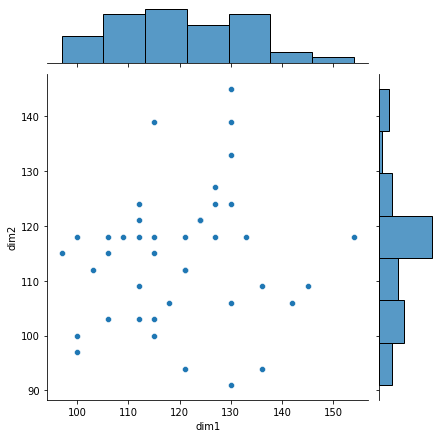

In [ ]:
ax=sns.jointplot(dim1,dim2)

ax.set_axis_labels('dim1', 'dim2')

CNN cannot train on different sized images. So, we need to reshape themm


In [ ]:
np.mean(dim1)

120.16279069767442

In [ ]:
np.mean(dim2)

114.72093023255815

In [ ]:
# all the images are resized to image_shape
image_shape = (d1,d2,3)

##Preparing train and test Image Generator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip = True,
                              fill_mode ='nearest' 
                              )

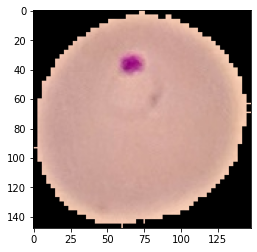

In [ ]:
parasitized_cell_img = imread(parasitized_cell)
plt.imshow(parasitized_cell_img)

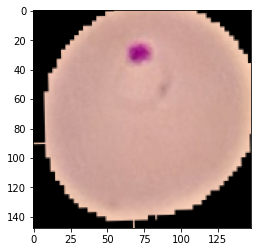

In [ ]:
plt.imshow(image_gen.random_transform(parasitized_cell_img))

In [ ]:
#Generating more images

image_gen.flow_from_directory(train_path)

Found 416 images belonging to 2 classes.


In [ ]:
batch_size = 16

In [ ]:
import time
st=time.time()
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary'
                                               )
end=time.time()
print("total time in minutes=", ((end-st)/60))

Found 416 images belonging to 2 classes.
total time in minutes= 0.0017647941907246907


In [ ]:

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle= False
                                               )

Found 134 images belonging to 2 classes.


##Creating the Model

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 113, 116, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 58, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 58, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 26, 64)        1

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
st=time.time()
results = model.fit_generator(train_image_gen, epochs=20, verbose=1,
                              validation_data = test_image_gen , 
                              callbacks = [early_stop])
end=time.time()
print("total time to fit data =", ((end-st)/60) , "minutes")

Epoch 1/20
26/26 [==============================] - 294s 11s/step - loss: 0.7201 - accuracy: 0.5216 - val_loss: 0.6839 - val_accuracy: 0.6791
Epoch 2/20
26/26 [==============================] - 3s 134ms/step - loss: 0.6547 - accuracy: 0.5745 - val_loss: 0.6972 - val_accuracy: 0.3731
Epoch 3/20
26/26 [==============================] - 3s 134ms/step - loss: 0.5778 - accuracy: 0.7067 - val_loss: 0.7018 - val_accuracy: 0.5149
Epoch 4/20
26/26 [==============================] - 3s 134ms/step - loss: 0.4494 - accuracy: 0.7933 - val_loss: 0.7048 - val_accuracy: 0.5373
Epoch 5/20
26/26 [==============================] - 3s 133ms/step - loss: 0.4178 - accuracy: 0.8341 - val_loss: 0.5508 - val_accuracy: 0.7313
Epoch 6/20
26/26 [==============================] - 3s 134ms/step - loss: 0.4433 - accuracy: 0.8317 - val_loss: 0.4823 - val_accuracy: 0.7761
Epoch 7/20
26/26 [==============================] - 3s 134ms/step - loss: 0.3302 - accuracy: 0.8846 - val_loss: 0.3855 - val_accuracy: 0.8358
Epoch 

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 113, 116, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 58, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 58, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 26, 64)        1

In [ ]:
# Saved model
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
model_1 = keras.models.load_model("my_model")

In [ ]:
pred= model_1.predict_generator(test_image_gen)

In [ ]:
pred

array([[1.81871201e-05],
       [4.23573237e-03],
       [7.06599534e-01],
       [8.51699950e-13],
       [2.44921846e-19],
       [1.93766132e-02],
       [6.63201354e-06],
       [1.84766377e-05],
       [1.13670819e-01],
       [8.12176287e-01],
       [3.66870481e-08],
       [1.78497737e-06],
       [7.24161863e-01],
       [8.19026768e-01],
       [5.58342563e-08],
       [7.51707017e-01],
       [8.11163306e-01],
       [7.01619592e-03],
       [2.78287684e-04],
       [2.76995171e-02],
       [3.56187257e-07],
       [4.54687659e-04],
       [8.12222362e-01],
       [4.21834141e-02],
       [1.11190461e-01],
       [5.74918158e-06],
       [8.75239745e-02],
       [1.30797026e-03],
       [1.07070290e-08],
       [7.88705074e-06],
       [3.24463956e-02],
       [1.69722185e-07],
       [5.41633969e-12],
       [8.24969471e-01],
       [2.52262503e-01],
       [8.19936574e-01],
       [8.19151938e-01],
       [8.08881938e-01],
       [8.14495862e-01],
       [3.31352465e-02],


In [ ]:
predictions = pred > 0.7


In [ ]:
len(predictions)
predictions

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        91
           1       0.72      1.00      0.83        43

    accuracy                           0.87       134
   macro avg       0.86      0.91      0.87       134
weighted avg       0.91      0.87      0.88       134



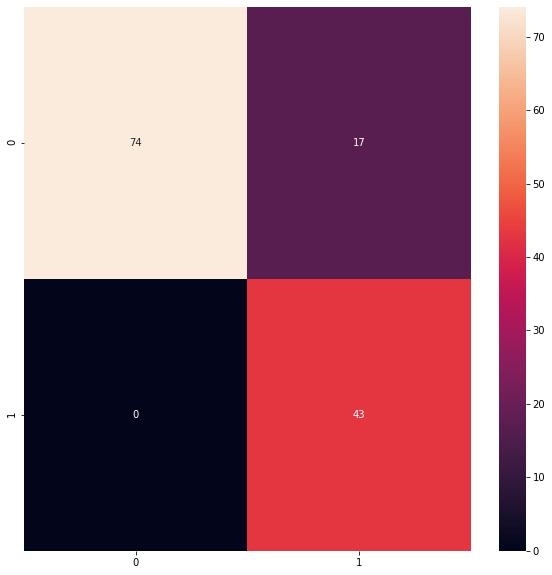

In [ ]:
# get the confusion matrix
cm = confusion_matrix(test_image_gen.classes, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)